# MNIST MLP - copied from week 2

You should already have gone through the `GettingStartedSequentialModels` notebook -- if not you'll be lost here!

In [14]:
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import time

We're going to use some examples from [https://github.com/fchollet/keras/tree/master/examples](https://github.com/fchollet/keras/tree/master/examples).
There are tons more and you should check them out!
We'll use these examples to learn about some different sorts of layers, and strategies for our activation functions, loss functions, optimizers, etc.

## Simple Deep NN on the MNIST Dataset

This examples is from [https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py).
It's a good one to start with because it's not much more complex than what we have seen, but uses real data!

In [15]:
import keras
from keras.datasets import mnist # load up the training data!
from keras.models import Sequential # our model
from keras.layers import Dense, Dropout # Dropout laters?!
from keras.optimizers import RMSprop # our optimizer

Typically it's good practice to specify your parameters together

In [16]:
batch_size = 128
num_classes = 10
epochs = 10 # this is too low 

Now get the data.
It's nicely split up between training and testing data which we'll see can be useful.
We'll also see that this data treats the images as matrices (row is an observation, column is a pixel).
However, the input data _doesn't need to be a matrix_.

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


The tutorial then makes a few changes to the data.
First, reshape it -- to make sure that the rows and columns are what we expect them to be.
Then, divide by 255 so that the values go from 0 to 1.
Such scaling is typically a good idea.
It also treats the $X$ values as `float32` which you don't have to worry about too much but makes computation a bit faster (at the expense of non-critical numerical detail).

In [19]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


As before we use the `to_categorical()` function

In [20]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Now define our model

In [21]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax')) # remember y has 10 categories!

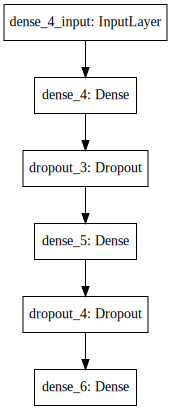

In [22]:
# comment this line if you don't have graphviz installed
SVG(model_to_dot(model).create(prog='dot', format='svg'))

What is a "dropout layer"?
See [Quora](https://www.quora.com/In-Keras-what-is-a-dense-and-a-dropout-layer):

> Using “dropout", you randomly deactivate certain units (neurons) in a layer with a certain probability $p$. So, if you set half of the activations of a layer to zero, the neural network won’t be able to rely on particular activations in a given feed-forward pass during training. As a consequence, the neural network will learn different, redundant representations; the network can’t rely on the particular neurons and the combination (or interaction) of these to be present. Another nice side effect is that training will be faster.

We can use the `summary()` method to look at our model instead of the plot -- this _will_ work on your computer.

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Now let's run our model.
Note that by giving it a name (`history = model.fit(...`) we'll be able to access some of its outputs.
We also use the `validation_data` argument to make it print out the model performance on validation data (which is __not__ used for fitting the model/calculating the back-propagation).
The `verbose=1` makes the model talk to us as it fits -- put 0 to make it run silently

In [25]:
start = time.time()
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
finish = time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s - loss: 0.2432 - acc: 0.9249 - val_loss: 0.1133 - val_acc: 0.9643
Epoch 2/10
60000/60000 [==============================] - 10s - loss: 0.1017 - acc: 0.9689 - val_loss: 0.1147 - val_acc: 0.9625
Epoch 3/10
60000/60000 [==============================] - 11s - loss: 0.0762 - acc: 0.9772 - val_loss: 0.0922 - val_acc: 0.9744
Epoch 4/10
60000/60000 [==============================] - 10s - loss: 0.0618 - acc: 0.9821 - val_loss: 0.0918 - val_acc: 0.9741
Epoch 5/10
60000/60000 [==============================] - 10s - loss: 0.0506 - acc: 0.9848 - val_loss: 0.0729 - val_acc: 0.9804
Epoch 6/10
60000/60000 [==============================] - 10s - loss: 0.0443 - acc: 0.9865 - val_loss: 0.0834 - val_acc: 0.9794
Epoch 7/10
60000/60000 [==============================] - 10s - loss: 0.0386 - acc: 0.9881 - val_loss: 0.1257 - val_acc: 0.9680
Epoch 8/10
60000/60000 [==============================

Now we can score our model

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('training wall clock time: %5.2f min' % ((finish-start)/60.))

Test loss: 0.0923509962029
Test accuracy: 0.9805
training wall cloc time:  1.74


## Interpreting Validation Performance

It's nice to see how our model performs on validation data.
This gives us a nice benchmark on how well the model generalizes to data that it hasn't used in training before.
However, there are some limitations.

- In this case the validation score tells us how well our model does on new MNIST data in the same format as the original data. It doesn't tell us how good it is at image classification on other types of data.
- When comparing many models, if we select the model with the best validation score we should be aware that this is a form of overfitting!